In [1]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time

In [2]:
input_data = 'Gaussian_mnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [1,5,10,20,50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML','TRUE','LW','NERCOME']
pca        = True
masks      = [False]

In [3]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10
if input_data == 'Gaussian_mnist':
    load_data = load_Gaussian_mnist

In [4]:
x_train, targets_train, x_test, targets_test, tru_covs = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(50000,) (50000, 784) (10000, 784) (10000,)


In [5]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [6]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,tru_cov=tru_covs['covs'], tru_mean=tru_covs['means'], rerun=False)

../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_0.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_1.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_2.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_3.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_4.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_5.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_6.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_7.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_8.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_ML_9.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_TRUE_0.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_TRUE_1.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_TRUE_2.pkl
../outputs/Gaussian_mnist/covariance_estimator/cov_estimate_TRUE_3.pkl
../outputs/Gaussian_mnist/

True

In [7]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=False)

ML inpainted 1
ML inpainted 5
ML inpainted 10
ML inpainted 20
ML inpainted 50
ML inpainted 200
ML inpainted 500
ML inpainted 784
pca 1
pca 5
pca 200
pca 500
pca 784
TRUE inpainted 1
TRUE inpainted 5
TRUE inpainted 10
TRUE inpainted 20
TRUE inpainted 50
TRUE inpainted 200
TRUE inpainted 500
TRUE inpainted 784
LW inpainted 1
LW inpainted 5
LW inpainted 10
LW inpainted 20
LW inpainted 50
LW inpainted 200
LW inpainted 500
LW inpainted 784
NERCOME inpainted 1
NERCOME inpainted 5
NERCOME inpainted 10
NERCOME inpainted 20
NERCOME inpainted 50
NERCOME inpainted 200
NERCOME inpainted 500
NERCOME inpainted 784


../outputs/Gaussian_mnist/figures/MLvsTRUE_inpainted.png


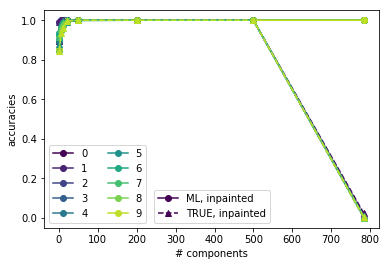

In [15]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted.png')

../outputs/Gaussian_mnist/figures/MLvsPCA_inpainted_test.png


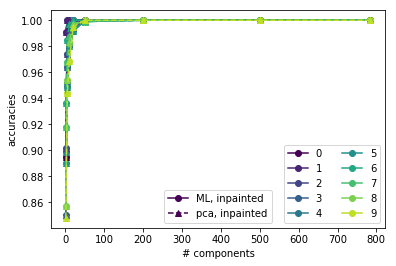

In [16]:
_= make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted_test.png')

../outputs/Gaussian_mnist/figures/MLvsLW_inpainted_test.png


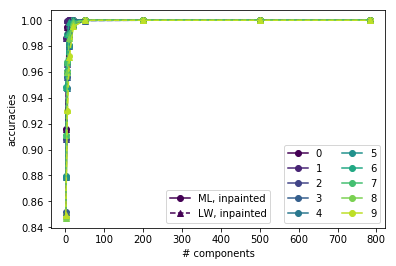

In [20]:
_= make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')

../outputs/Gaussian_mnist/figures/MLvsNERCOME_inpainted_test.png


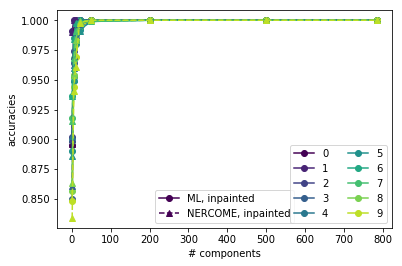

In [18]:
_= make_acc_figure(['ML','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsNERCOME_inpainted_test.png')

In [19]:
results = perform_classification(x_train, targets_train, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='train', rerun=False)

ML inpainted 1
ML inpainted 5
ML inpainted 10
ML inpainted 20
ML inpainted 50
ML inpainted 200
ML inpainted 500
ML inpainted 784
pca 1
pca 5
pca 10
pca 20
pca 50
pca 200
pca 500
pca 784
TRUE inpainted 1
TRUE inpainted 5
TRUE inpainted 10
TRUE inpainted 20
TRUE inpainted 50
TRUE inpainted 200
TRUE inpainted 500
TRUE inpainted 784
LW inpainted 1
LW inpainted 5
LW inpainted 10
LW inpainted 20
LW inpainted 50
LW inpainted 200
LW inpainted 500
LW inpainted 784
NERCOME inpainted 1
NERCOME inpainted 5
NERCOME inpainted 10
NERCOME inpainted 20
NERCOME inpainted 50
NERCOME inpainted 200
NERCOME inpainted 500
NERCOME inpainted 784


../outputs/Gaussian_mnist/figures/MLvsTRUE_inpainted_train.png


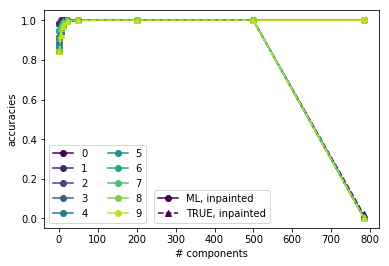

In [21]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted_train.png')

In [22]:
_=make_acc_figure(['ML','TRUE'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsTRUE_inpainted_train.png')

{'LW': {'inpainted': {'accs': array([[ 0.9162,  0.9866,  0.9084,  0.8514,  0.8786,  0.8798,  0.9484,
            0.9114,  0.8472,  0.8496],
          [ 0.995 ,  1.    ,  0.9662,  0.9562,  0.9476,  0.9608,  0.9894,
            0.9676,  0.96  ,  0.9304],
          [ 1.    ,  1.    ,  0.996 ,  0.98  ,  0.9896,  0.981 ,  0.9984,
            0.9904,  0.9862,  0.9716],
          [ 1.    ,  1.    ,  0.9994,  0.9964,  0.9984,  0.9964,  1.    ,
            0.9992,  0.998 ,  0.9952],
          [ 1.    ,  1.    ,  1.    ,  0.9998,  1.    ,  1.    ,  1.    ,
            1.    ,  1.    ,  1.    ],
          [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
            1.    ,  1.    ,  1.    ],
          [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
            1.    ,  1.    ,  1.    ],
          [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
            1.    ,  1.    ,  1.    ]])}},
 'ML': {'inpainted': {'accs': array([[ 0.9162,  0.9866,  0.9084, 